In [3]:
import pandas as pd
import os

In [4]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
all_data = all_months_data

In [15]:
all_data['Months'] = all_data['Order Date'].str[:2]

all_data['Months'] = all_data['Months'].astype('int32')
all_data['Months'].dtype

ValueError: cannot convert float NaN to integer

In [27]:
na_rows = all_data[all_data.isna().any(axis=1)]
all_data = all_data.drop(na_rows.index)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [33]:
all_data['Months'] = all_data['Order Date'].str[:2]

all_data['Months'] = all_data['Months'].astype('int')
all_data['Months'].dtype

ValueError: invalid literal for int() with base 10: 'Or'

In [36]:
all_data = all_data[all_data['Order Date'].str[:2] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [40]:
all_data['Months'] = all_data['Order Date'].str[:2].astype('int')

all_data.loc[:, 'Months'] = all_data['Months']

all_data.head()

C:\Users\Talha\AppData\Local\Temp\ipykernel_16016\3574233578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Months'] = all_data['Order Date'].str[:2].astype('int')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [52]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


C:\Users\Talha\AppData\Local\Temp\ipykernel_16016\418593133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
C:\Users\Talha\AppData\Local\Temp\ipykernel_16016\418593133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
C:\Users\Talha\AppData\Local\Temp\ipykernel_16016\418593133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [63]:
sales_amount = all_data.groupby('Months').sum()


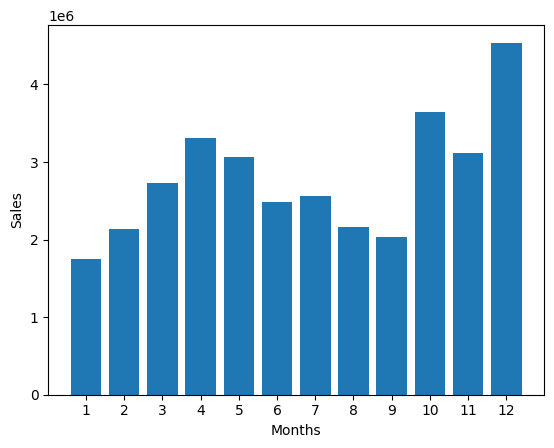

In [67]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, sales_amount['Sales'])

plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales')

plt.show()

In [103]:
def cityName(address):
    return address.split(',')[1].strip()

def stateName(address):
    return address.split(',')[2].strip()[:2]

all_data['Cities'] = all_data['Purchase Address'].apply(lambda x: cityName(x) + ' ' + stateName(x))
all_data


C:\Users\Talha\AppData\Local\Temp\ipykernel_16016\1671071352.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Cities'] = all_data['Purchase Address'].apply(lambda x: cityName(x) + ' ' + stateName(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


In [108]:
cities_grouped = all_data.groupby("Cities").sum()
cities_grouped['Sales'].sort_values(ascending=False)

Cities
San Francisco CA    8021214.37
Los Angeles CA      5298651.75
New York City NY    4538376.18
Boston MA           3561225.13
Atlanta GA          2716488.90
Dallas TX           2697145.60
Seattle WA          2682637.53
Portland OR         1817656.85
Austin TX           1770593.84
Portland ME          438332.96
Name: Sales, dtype: float64

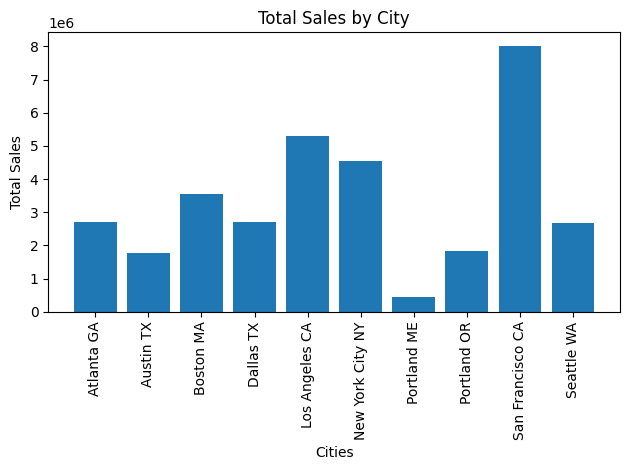

In [107]:


plt.bar(cities_grouped.index, cities_grouped['Sales'])

plt.xticks(rotation=90)

plt.xlabel('Cities')
plt.ylabel('Total Sales')
plt.title('Total Sales by City')

plt.tight_layout()

plt.show()

In [109]:
#### 3:

In [110]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\Talha\AppData\Local\Temp\ipykernel_16016\3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
C:\Users\Talha\AppData\Local\Temp\ipykernel_16016\3842191188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [111]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


In [112]:
all_data["Hour"] = all_data['Order Date'].dt.hour

C:\Users\Talha\AppData\Local\Temp\ipykernel_16016\452220377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Hour"] = all_data['Order Date'].dt.hour


In [113]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA,20
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA,16
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA,7
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA,17


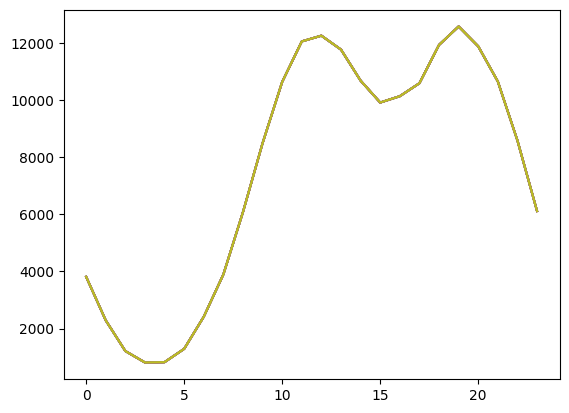

In [116]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())

plt.show()


In [117]:
duplicate_products = all_data[all_data['Order ID'].duplicated(keep=False)]
duplicate_products.head(20) 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,17
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,11
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,11


In [125]:
duplicate_products["Grouped"] = duplicate_products.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicate_products = duplicate_products[['Order ID', 'Grouped']].drop_duplicates()
duplicate_products.head(10)

,Order ID,Grouped
0,176560,"Google Phone,Wired Headphones"
2,176574,"Google Phone,USB-C Charging Cable"
4,176585,Bose SoundSport Headphones
5,176586,"AAA Batteries (4-pack),Google Phone"
7,176672,"Lightning Charging Cable,USB-C Charging Cable"
9,176681,"Apple Airpods Headphones,ThinkPad Laptop"
11,176739,"34in Ultrawide Monitor,Google Phone"
13,176774,"Lightning Charging Cable,USB-C Charging Cable"
15,176781,"iPhone,Lightning Charging Cable"
17,176797,"Google Phone,Bose SoundSport Headphones,Wired ..."


In [132]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicate_products['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable'), 946),
 (('iPhone', 'Lightning Charging Cable'), 939),
 (('iPhone', 'Wired Headphones'), 424),
 (('Google Phone', 'Wired Headphones'), 389),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 344),
 (('iPhone', 'Apple Airpods Headphones'), 343),
 (('Google Phone', 'Bose SoundSport Headphones'), 210),
 (('USB-C Charging Cable', 'Wired Headphones'), 150),
 (('Vareebadd Phone', 'Wired Headphones'), 133),
 (('Lightning Charging Cable', 'Wired Headphones'), 87)]

In [146]:
product_group = all_data.groupby('Product')['Quantity Ordered']

quantity_ordered = product_group.sum()['Quantity Ordered']


KeyError: 'Quantity Ordered'

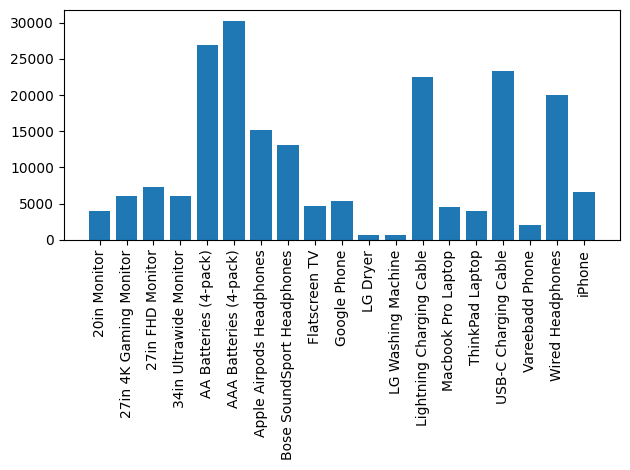

In [148]:
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xticks(rotation = 90)
plt.tight_layout()

plt.show()

In [150]:
prices = all_data.groupby('Product')['Price Each'].mean()

prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\Talha\AppData\Local\Temp\ipykernel_16016\1861379140.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical')
C:\Users\Talha\AppData\Local\Temp\ipykernel_16016\1861379140.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(products, rotation = 'vertical')


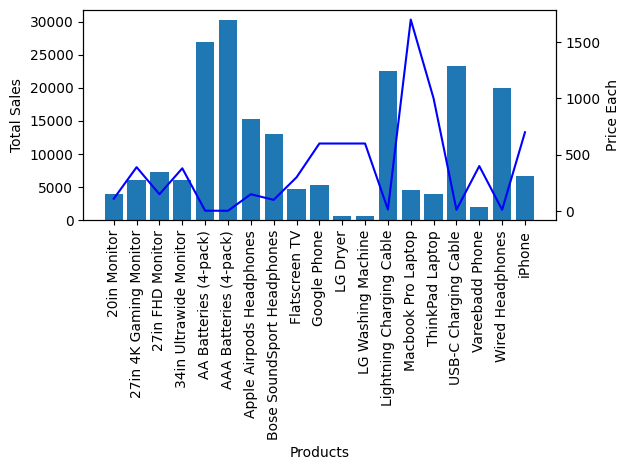

In [176]:
import numpy as np

fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, 'b-')

ax1.set_xlabel("Products")
ax1.set_ylabel("Total Sales")
ax2.set_ylabel("Price Each")

ax1.set_xticklabels(products, rotation = 'vertical')
ax2.set_xticklabels(products, rotation = 'vertical')

plt.tight_layout()


plt.show()